<a href="https://colab.research.google.com/github/vijivenkadesh/AI_ML/blob/main/insurance_forecast_by_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(insurance_data['region'].value_counts())
insurance_data['region'] = insurance_data['region'].astype('category')
print(insurance_data['region'].cat.categories)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cf = ColumnTransformer(transformers=[('encoding', OneHotEncoder(), ['sex', 'smoker', 'region'] )], remainder='passthrough')
df_new = pd.DataFrame(cf.fit_transform(insurance_data))

In [6]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520


In [7]:
insurance_oht = pd.get_dummies(insurance_data)
insurance_oht.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
X = insurance_oht.drop('charges', axis=1)
y = insurance_oht['charges']


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [10]:
tf.random.set_seed(42)

In [11]:
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)
])

In [12]:
insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8568.5303 - mae: 8568.5303
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7878.0093 - mae: 7878.0093
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7550.8208 - mae: 7550.8208
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7808.3896 - mae: 7808.3896
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7678.7036 - mae: 7678.7036
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7579.3970 - mae: 7579.3970
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7548.6143 - mae: 7548.6143
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7787.0830 - mae: 7787.0830
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7488.7607 - mae: 7488.7607
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7644.0962 - mae: 7644.0962

In [13]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 6941.5073 - mae: 6941.5068


[6941.50732421875, 6941.5068359375]

# Tuning the Model

#Optimizer Adam and Leraning rate added

In [14]:
tf.random.set_seed(42)

In [15]:
insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

In [16]:
insurance_model2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

In [17]:
history = insurance_model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 12982.1299 - mae: 12982.1299
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 10601.9922 - mae: 10601.9922
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7693.6943 - mae: 7693.6943
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7438.0996 - mae: 7438.0996
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 7360.8062 - mae: 7360.8062
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 7297.3862 - mae: 7297.3862
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7212.6431 - mae: 7212.6431
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7136.0098 - mae: 7136.0098
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 7052.9121 - mae: 7052.9121
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 6966.6191 - mae: 6966.

In [18]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6941.5073 - mae: 6941.5068


[6941.50732421875, 6941.5068359375]

In [19]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.3750 - mae: 3171.3750


[3171.375, 3171.375]

Text(0, 0.5, 'loss')

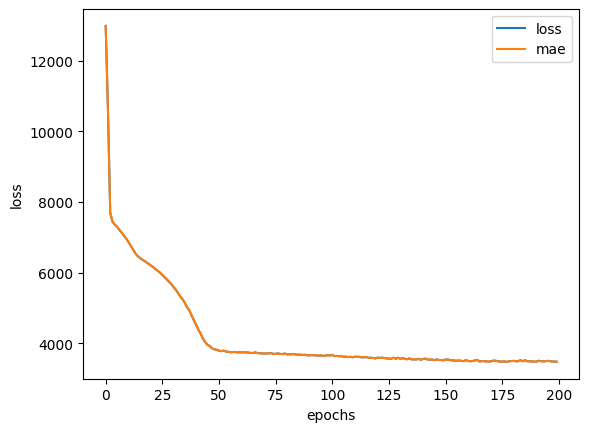

In [20]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')